In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sbn
import matplotlib.pyplot as pyplt
import matplotlib
import geopandas
from wordcloud import WordCloud
import os
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore') 
!pip install openpyxl   

# Importing the dataset
athletes = pd.read_excel('~/Desktop/Athletes.xlsx', index_col = 0)
coaches = pd.read_excel('~/Desktop/Coaches.xlsx', index_col = 0)
entries_gender = pd.read_excel('~/Desktop/EntriesGender.xlsx', index_col = 0)
medals = pd.read_excel('~/Desktop/Medals.xlsx', index_col = 0)
teams = pd.read_excel('~/Desktop/Teams.xlsx', index_col = 0)

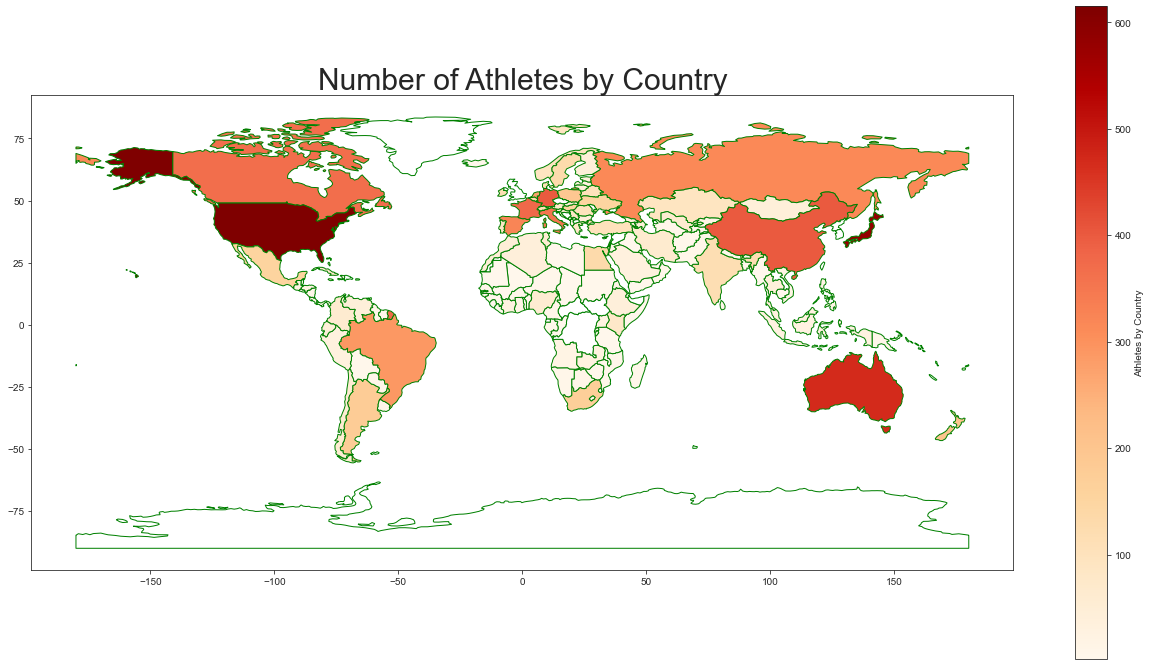

In [10]:
# Change some contries names
athletes['NOC'] = athletes['NOC'].replace('ROC', 'Russia')
athletes['NOC'] = athletes['NOC'].replace("People's Republic of China", 'China')
athletes['NOC'] = athletes['NOC'].replace('Islamic Republic of Iran', 'Iran')
athletes['NOC'] = athletes['NOC'].replace('United Republic of Tanzania', 'Tanzania')
athletes['NOC'] = athletes['NOC'].replace('Democratic Republic of the Congo', 'Democratic republic of the congo')

# Number of athletes by country
athletes_by_country = athletes.groupby('NOC').count().reset_index()
athletes_by_country.columns = ['country', 'count']                    # Set the correct variables'names
athletes_by_country = athletes_by_country.sort_values('count', ascending = False)
athletes_top_country = athletes_by_country.head(30)

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
athletes_by_country_final = world.merge(athletes_by_country, how = 'left', left_on=['name'], right_on=['country'])

sbn.set_style("ticks")
athletes_by_country_final.plot("count",
                           figsize=(22,12),
                           legend=True,
                           edgecolor="green",
                           legend_kwds={"label":"Athletes by Country"},
                           cmap='OrRd',
                           missing_kwds={"color":"white"}
                          )
pyplt.title("Number of Athletes by Country", fontsize = 30);

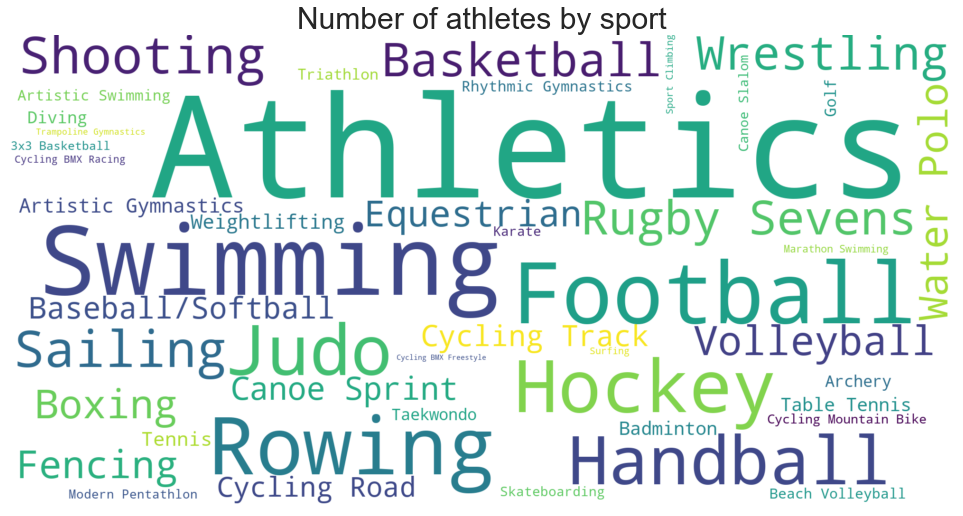

In [11]:
sport_count = athletes.Discipline.value_counts()
sport_count

sbn.set_style("ticks")

wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = sport_count)
pyplt.figure(figsize=(17,10))
pyplt.imshow(wordcloud, interpolation="bilinear")
pyplt.axis("off")
pyplt.title('Number of athletes by sport', fontsize = 30)
pyplt.show()

In [12]:
entries_gender
entries_gender.loc[:,['Female', 'Male', 'Total']] = entries_gender.loc[:,['Female', 'Male', 'Total']].astype(float)
entries_gender['discipline'] = entries_gender.index
entries_gender['females_ratio'] = entries_gender['Female'] / entries_gender['Total']
entries_gender['males_ratio'] = entries_gender['Male'] / entries_gender['Total']

fig = go.Figure()
fig.add_trace(go.Bar(
    y=entries_gender.discipline,
    x=entries_gender.females_ratio,
    orientation='h',
    name='Females',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)')
    )
))
fig.add_trace(go.Bar(
    y=entries_gender.discipline,
    x=entries_gender.males_ratio,
    orientation='h',
    name='Males',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)')
    )
))

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))

fig.update_layout(
                title = 'Distribution of disciplines by gender',
                template = template,
                barmode='stack', 
                autosize=False,
                width=680,
                height=900,
                margin=dict(
                  l=150,
                  r=100,
                   b=30,
                   t=100,
                   pad=4
                          )
)

fig.layout.xaxis.tickformat = ',.0%'
fig.show()

In [13]:
medals.rename(columns={'Team/NOC':'country'}, inplace=True)
medals_final = medals.copy()
medals_final['rank'] = medals_final.index
medals_final = medals_final[medals_final['rank'] <= 30]
fig = go.Figure()
fig.add_trace(go.Bar(
    y=medals_final.Gold,
    x=medals_final.country,
    name='Gold',
    marker=dict(
        color='rgb(255,215,0)',
        line=dict(color='rgba(0, 0, 0, 0.5)')
    )
))

fig.add_trace(go.Bar(
    y=medals_final.Silver,
    x=medals_final.country,
    name='Silver',
    marker=dict(
        color='rgb(192,192,192)',
        line=dict(color='rgba(0, 0, 0, 0.5)')
    )
))

fig.add_trace(go.Bar(
    y=medals_final.Bronze,
    x=medals_final.country,
    name='Bronze',
    marker=dict(
        color='rgb(205, 127, 50)',
        line=dict(color='rgba(0, 0, 0, 0.5)')
    )
))

template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=30)))

fig.update_layout(
                title = 'Medals by country <br><sup>Top 30 countries by rank</sup>',
                template = template,
                showlegend = False,
                barmode='stack', 
                autosize=False,
                width=680,
                height=650,
                margin=dict(
                  l=30,
                  r=30,
                  b=180,
                  t=100,
                  pad=4
                          )
)

fig.layout.xaxis.tickformat = ',.0%'
fig.show()